# 3d rainfall plot(surface data...3d view)

#### @author : chandrima & Abir (chakrabartychandrima91@gmail.com)

In [1]:
import os
from netCDF4 import Dataset
import numpy as np
from scipy.optimize import curve_fit
import xarray as xr

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from mpl_toolkits import mplot3d



In [3]:
rain=xr.open_dataset('D:/pai/data/monthlymean/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')


In [4]:
x=rain.LONGITUDE
y=rain.LATITUDE
X, Y = np.meshgrid(x, y)
Z=rain.rf[0,:,:]

C:\Users\This-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
C:\Users\This-PC\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


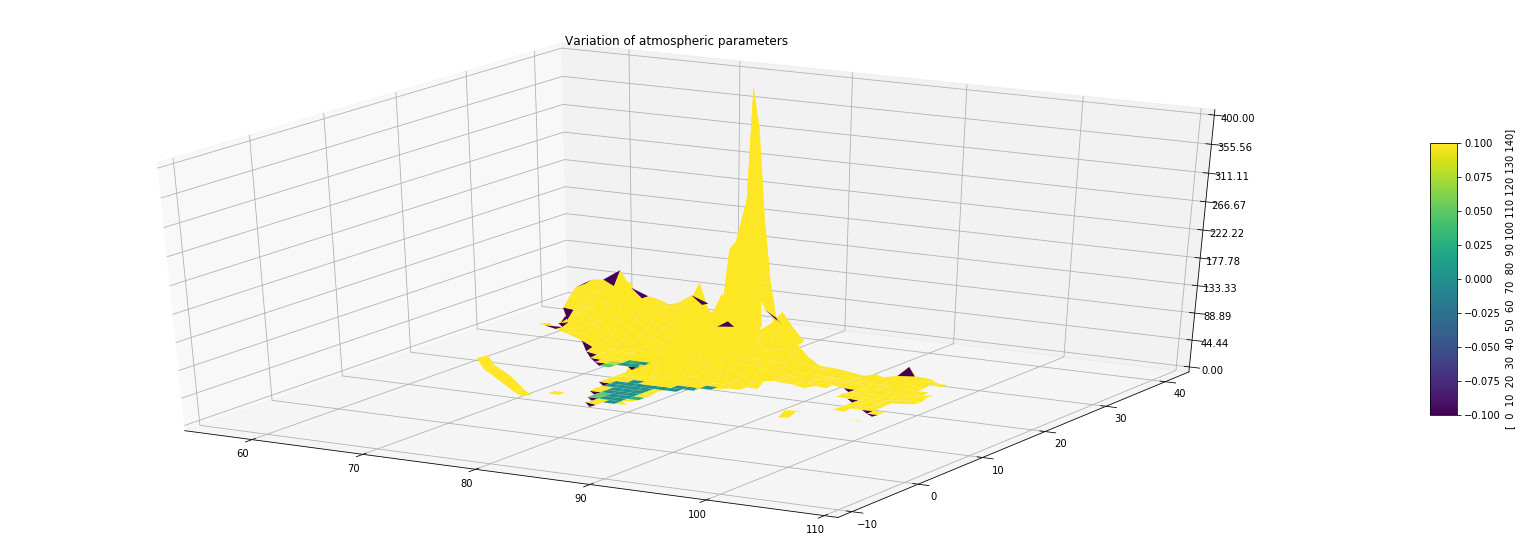

In [5]:
fig = plt.figure(figsize=[30,10])
ax = plt.axes(projection='3d')
levels=np.arange(0,150,10)

rain_3d=ax.plot_surface(X, Y, Z,rstride=1, cstride=1,
                 cmap='viridis', edgecolor='none')


ax.set_zlim(0, 400)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(rain_3d, label=levels,shrink=0.5, aspect=10)
ax.set_title('Variation of atmospheric parameters')
plt.show()

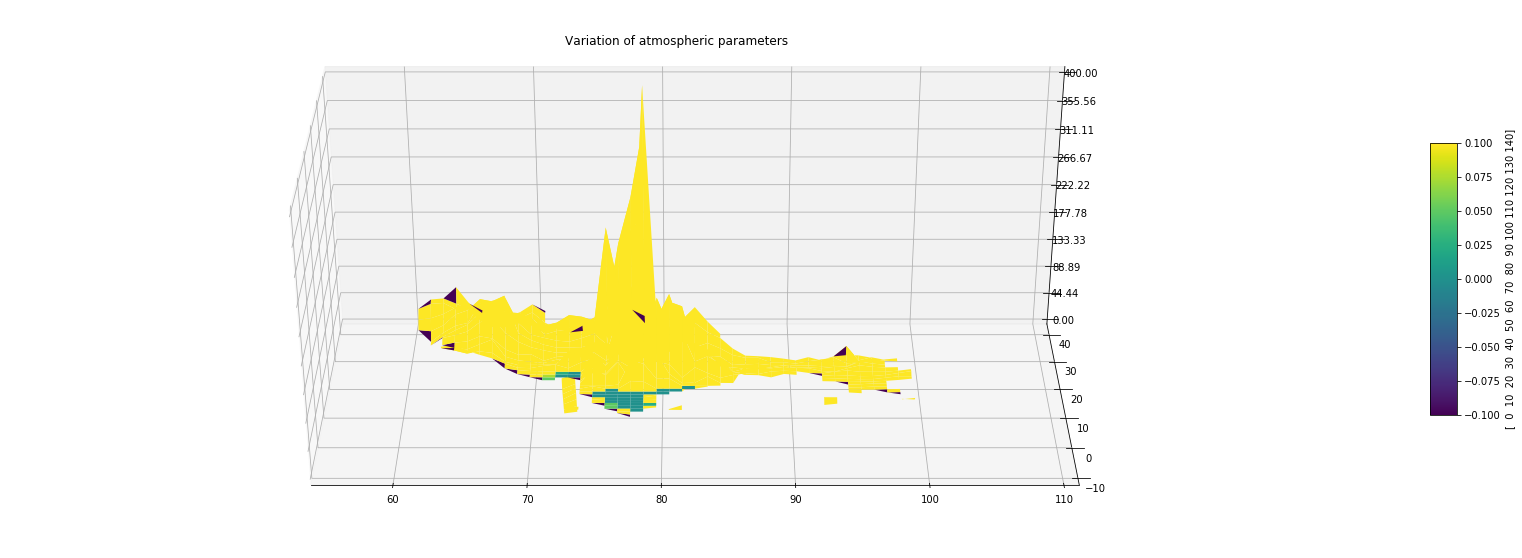

In [6]:
ax.view_init(30, 270)   #set the elevation=70deg and azimuthal angles=35((that is, rotated 35 degrees counter-clockwise about the z-axis).
fig

# 3D wind plot

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

In [1]:
ncep_u = xr.open_dataset('D:/pai/data/monthlymean/ncepreanalysis_uwnd.mon.mean_jan1948topresent.nc')
ncep_v = xr.open_dataset('D:/pai/data/monthlymean/ncepreanalysis_vwind.mon.mean_jan1948topresent.nc')
ncep_w = xr.open_dataset('D:/pai/data/monthlymean/ncepreanalysis_omega.mon.mean_jan1948topresent.nc')

# plot of wind over world

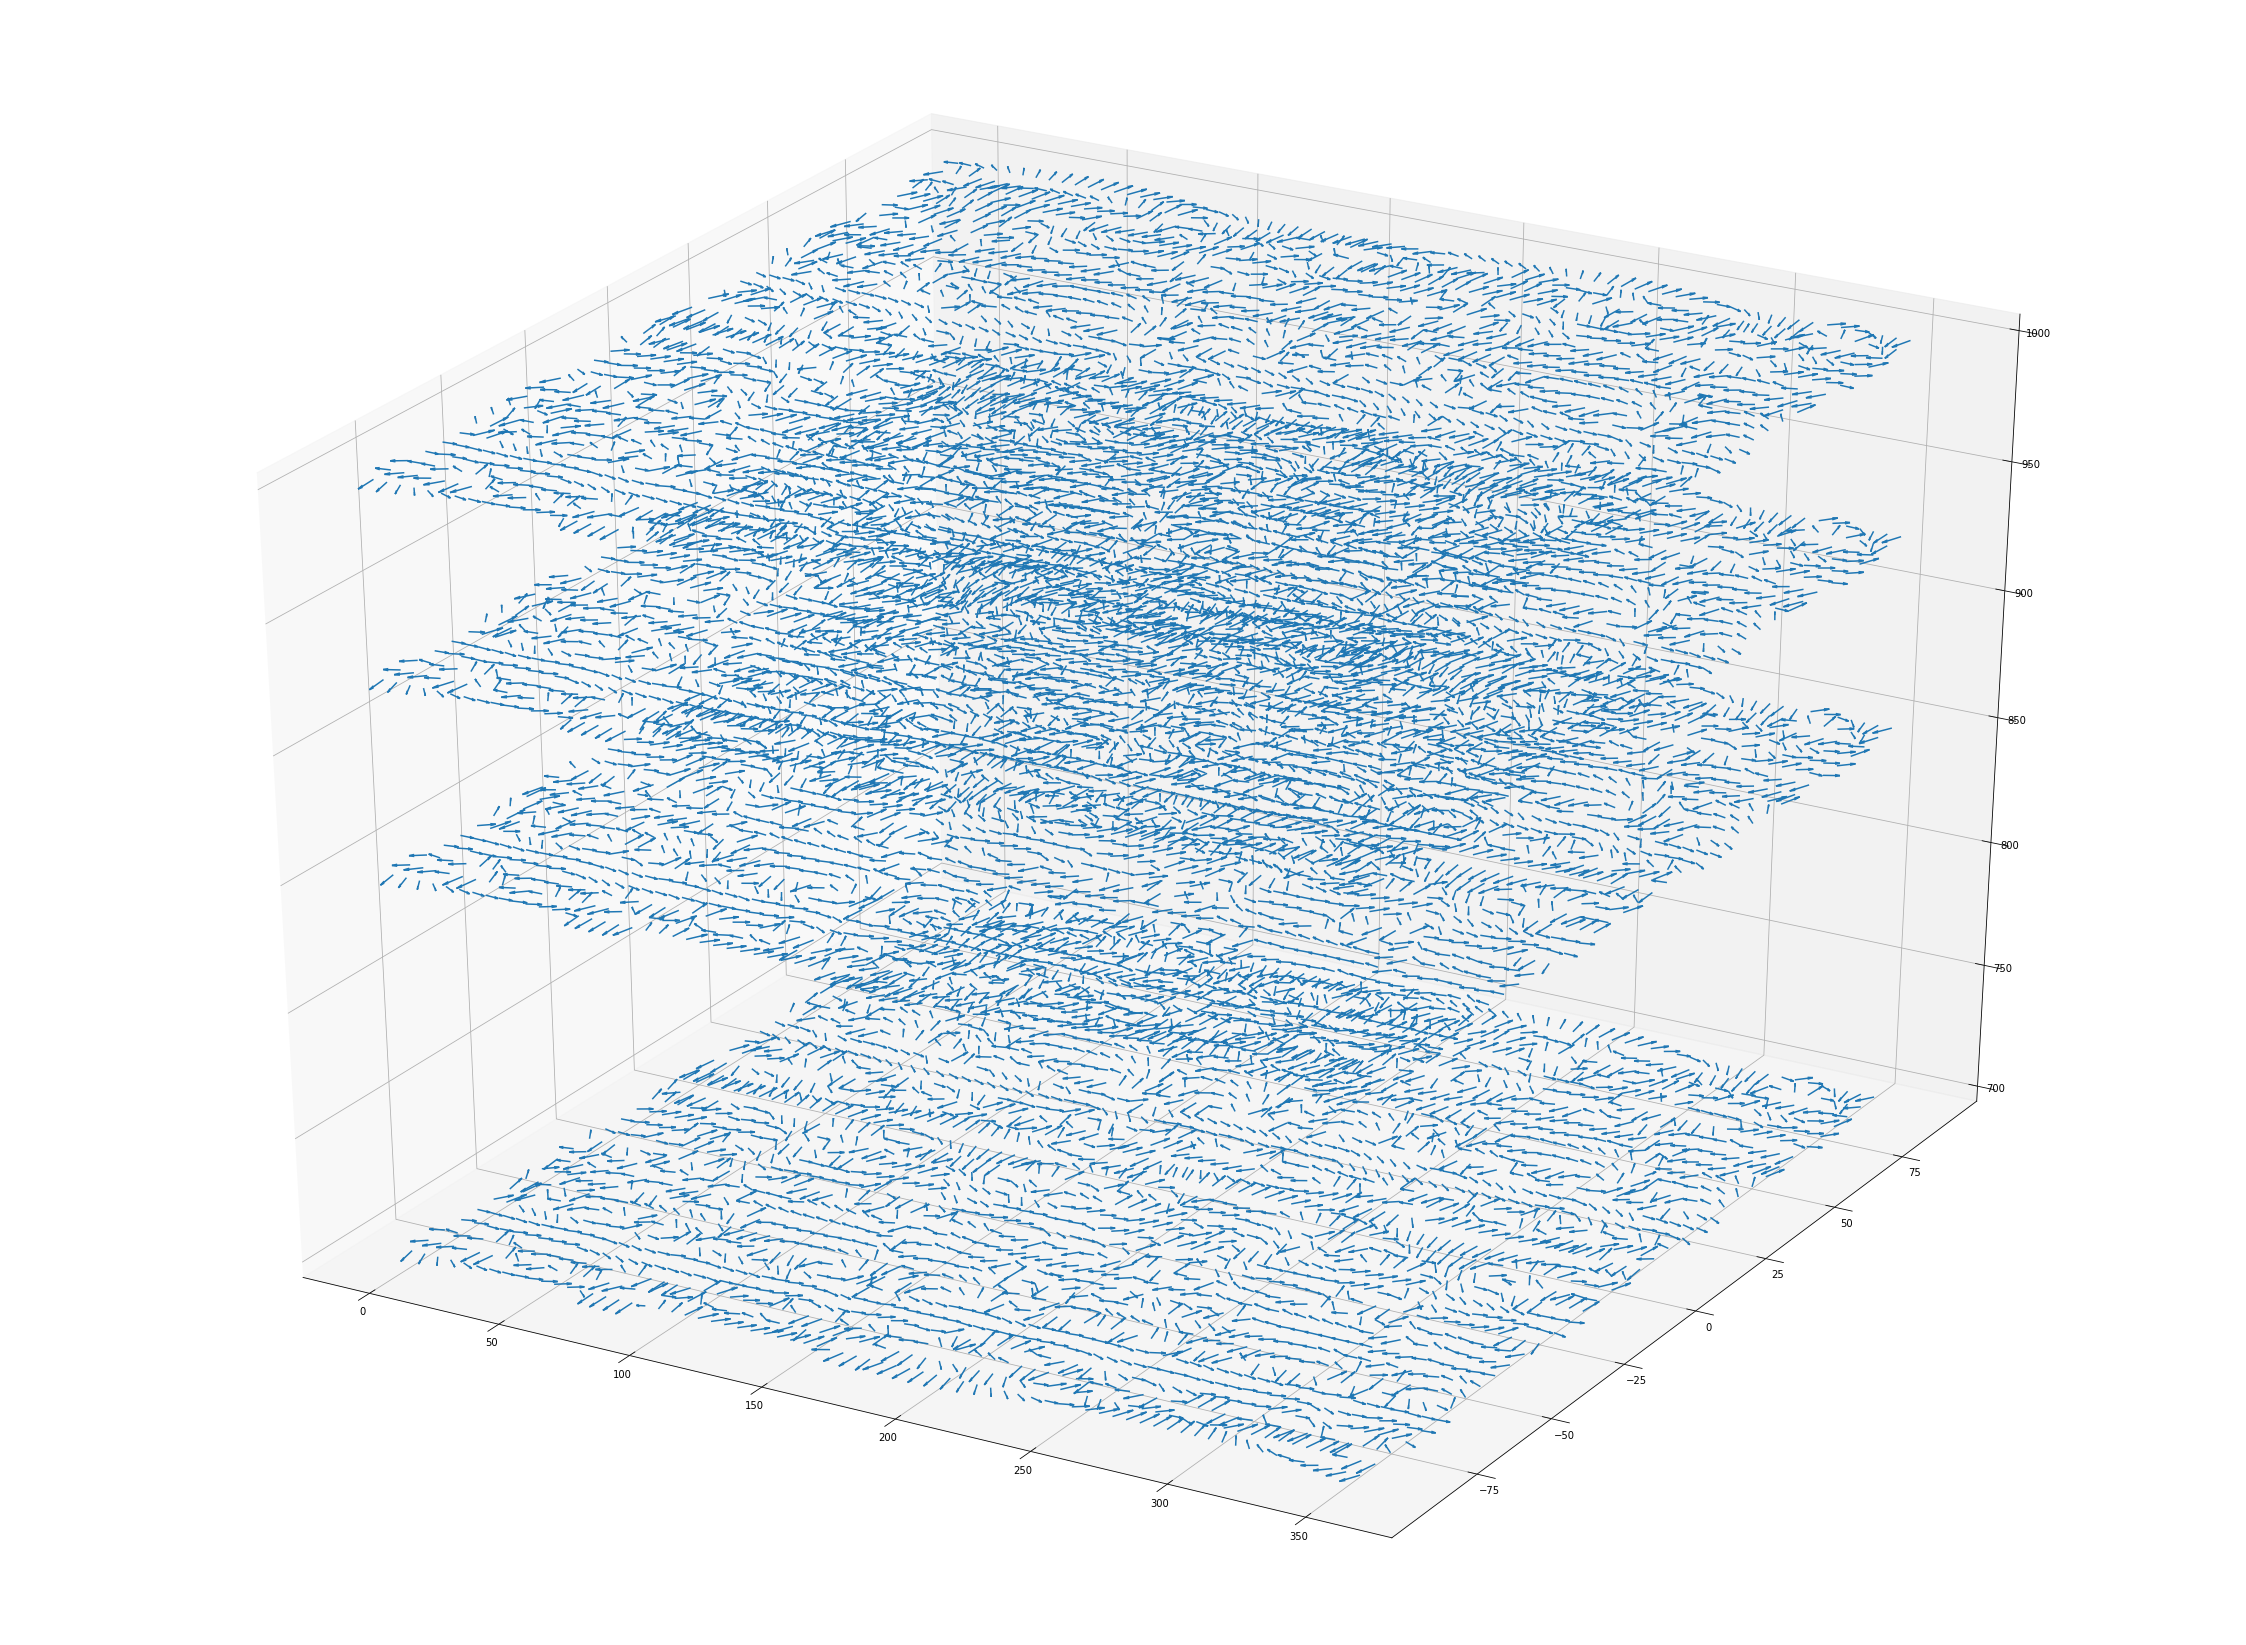

In [9]:
fig = plt.figure(figsize=[40,30])
ax = fig.gca(projection='3d')
x = ncep_u.lon[::2]
y = ncep_u.lat[::2]
z = ncep_u.level[:4]
X,Y,Z= np.meshgrid(x, y,z)

u=ncep_u.uwnd[0,:4,:,:]
v=ncep_v.vwnd[0,:4,:,:]
w=ncep_w.omega[0,:4,:,:]

ax.quiver(X, Y, Z, u[::2,::2,:].values.reshape(Z.shape)
          , v[::2,::2,:].values.reshape(Z.shape), 
          w[::2,::2,:].values.reshape(Z.shape), length=5,normalize=True)
plt.show()

# plot of wind over india(in specific region)

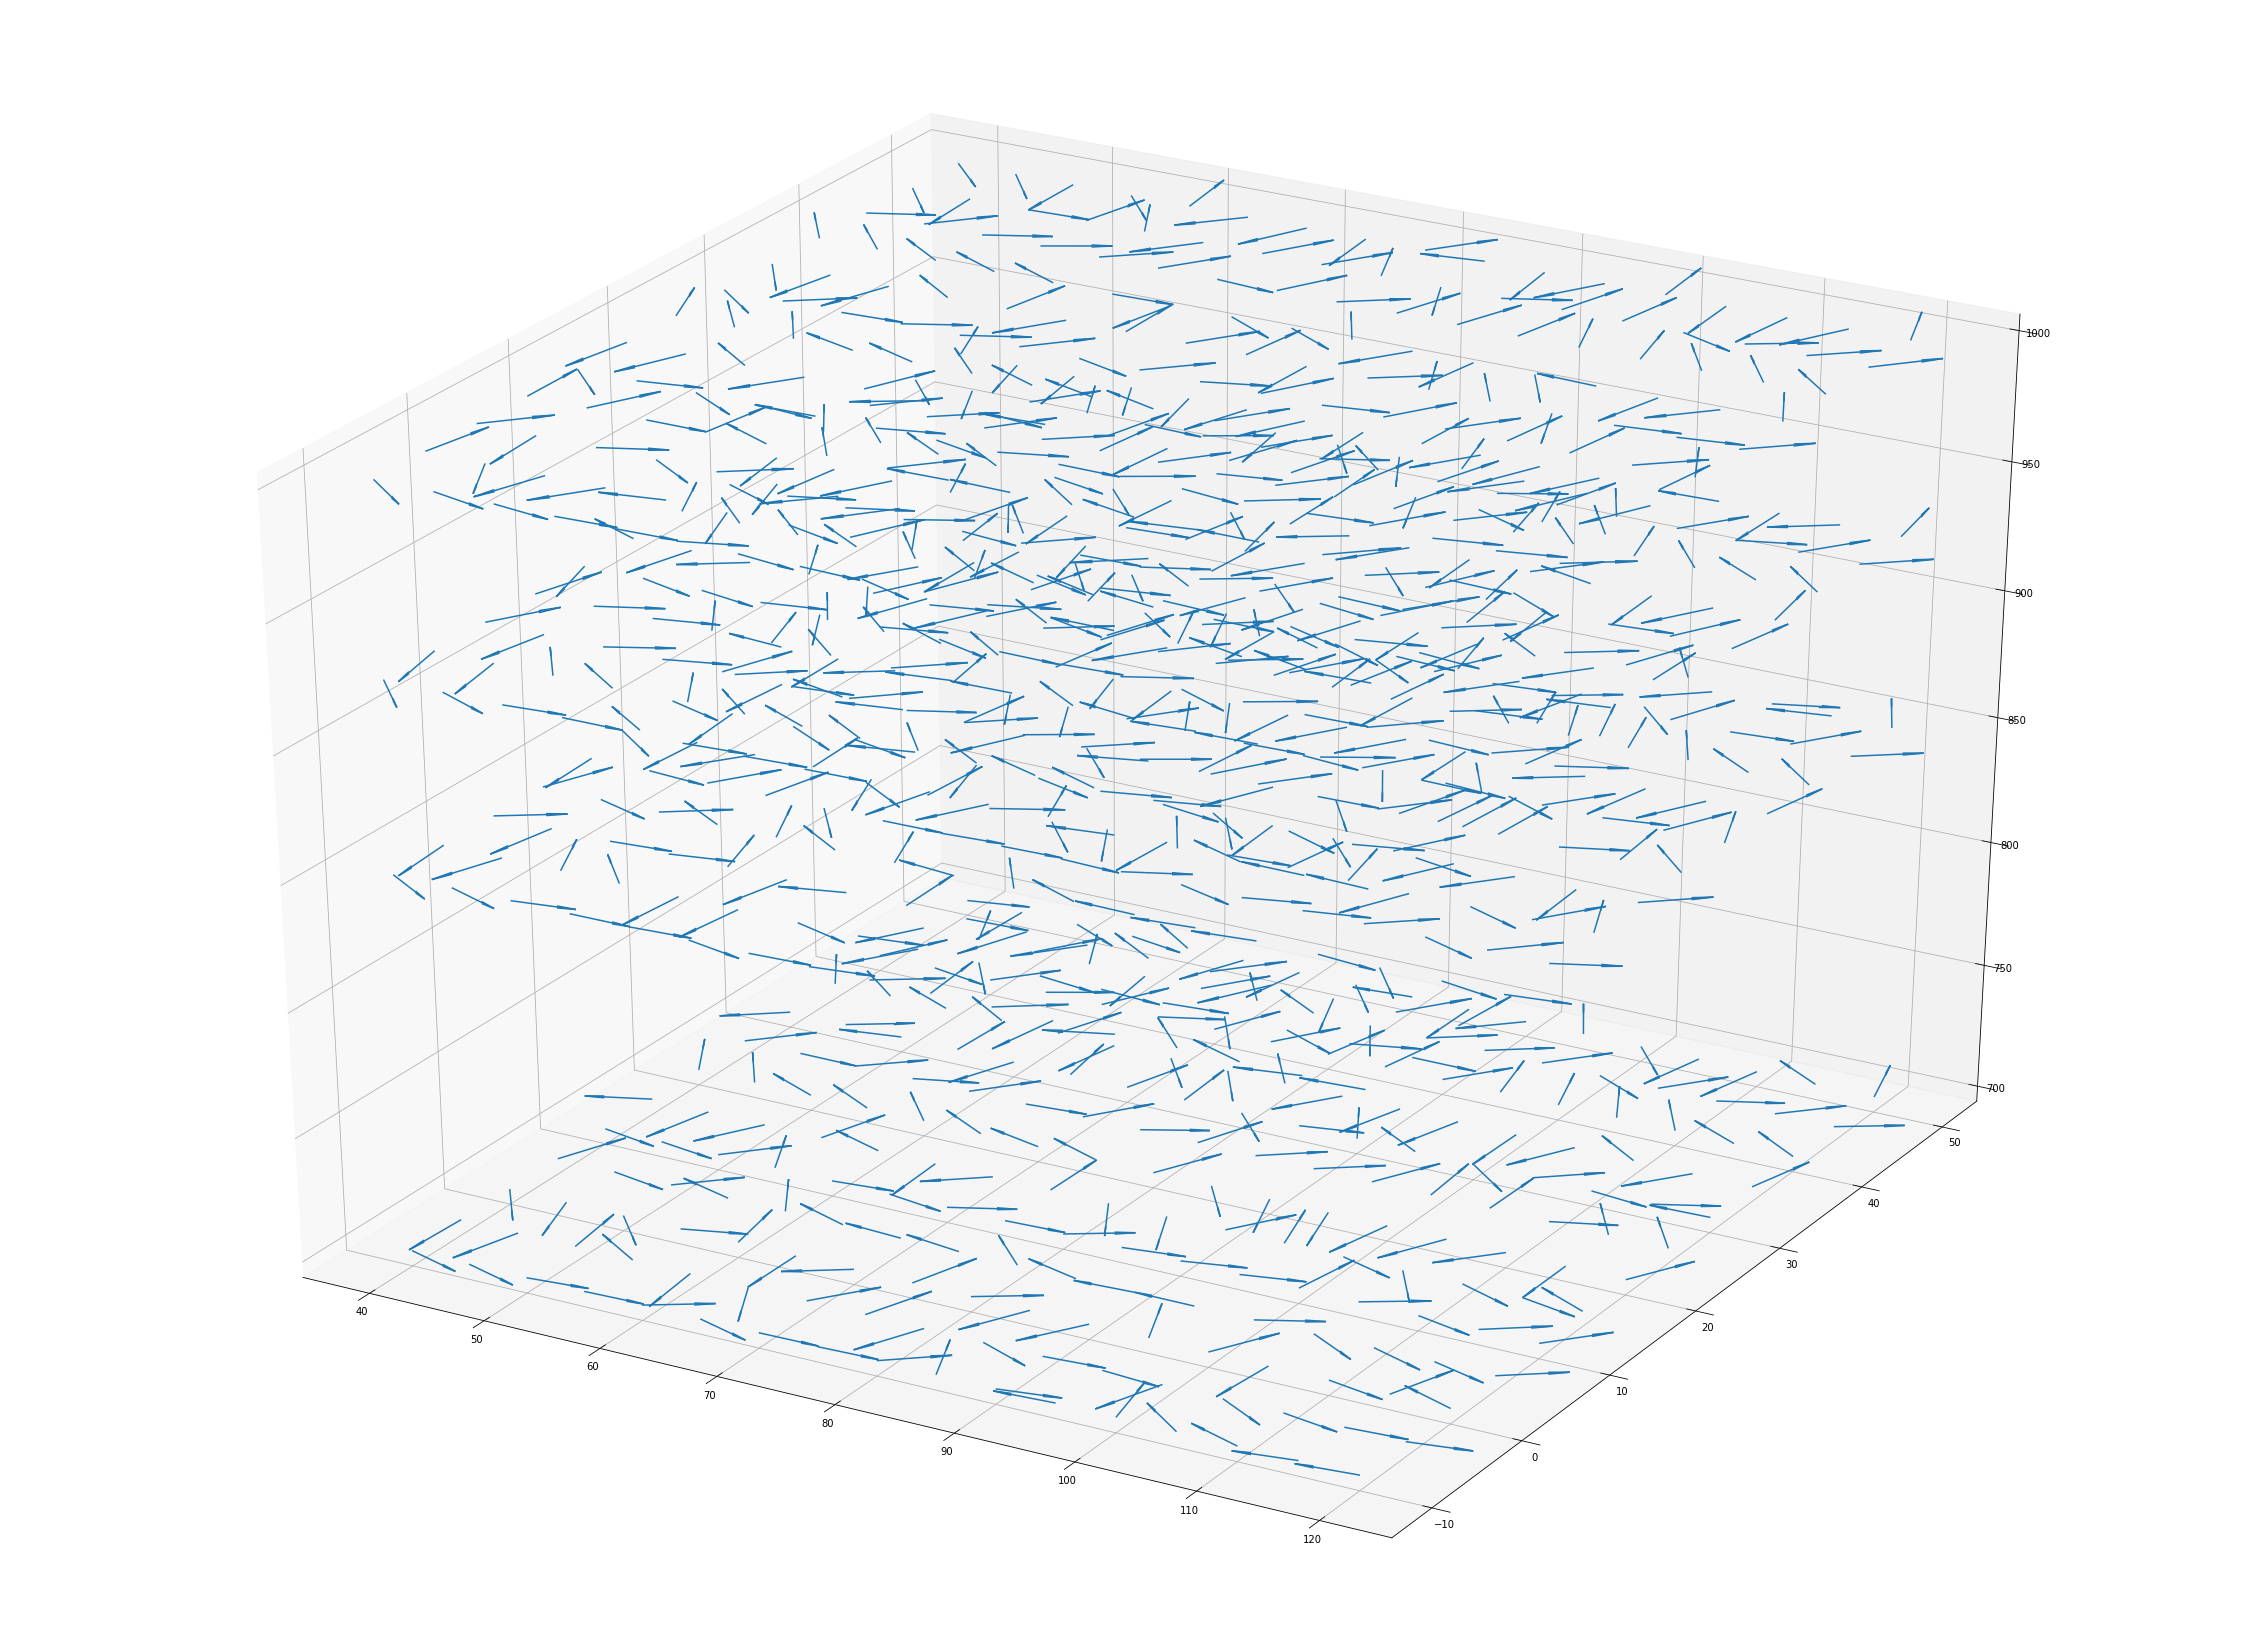

In [10]:
fig = plt.figure(figsize=[40,30])
ax = fig.gca(projection='3d')

uwnd_n=ncep_u.sel(lon=slice(40,120),lat=slice(50,-10))
vwnd_n=ncep_v.sel(lon=slice(40,120),lat=slice(50,-10))
wwnd_n=ncep_w.sel(lon=slice(40,120),lat=slice(50,-10))

x = uwnd_n.lon[::2]           #rf.sel(lon=slice(55,110),lat=slice(20,-5)) 
y = vwnd_n.lat[::2]
z = wwnd_n.level[:4]
X,Y,Z= np.meshgrid(x, y,z)

u=uwnd_n.isel(time=7).sel(level=slice(1000.0 ,700.))
v=vwnd_n.isel(time=7).sel(level=slice(1000.0 ,700.))
w=wwnd_n.isel(time=7).sel(level=slice(1000.0 ,700.))

# ax.quiver(X, Y, Z, u.uwnd[:,::2,::2].values.reshape(Z.shape)
#           , v.vwnd[:,::2,::2].values.reshape(Z.shape), 
#          w.omega[:,::2,::2].values.reshape(Z.shape), length=5,normalize=True)


ax.quiver(X, Y, Z, u[::2,::2,:].values.reshape(Z.shape)
          , v[::2,::2,:].values.reshape(Z.shape), 
          w[::2,::2,:].values.reshape(Z.shape), length=5,normalize=True)
# # plt.show()

# wind plot in loop over india

In [11]:
from celluloid import Camera 

In [12]:
rain=xr.open_dataset('D:/pai/data/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')
ncep_u = xr.open_dataset('D:/pai/data/ncepreanalysis_uwnd.mon.mean_jan1948topresent.nc')
ncep_v = xr.open_dataset('D:/pai/data/ncepreanalysis_vwind.mon.mean_jan1948topresent.nc')
ncep_w = xr.open_dataset('D:/pai/data/ncepreanalysis_omega.mon.mean_jan1948topresent.nc')

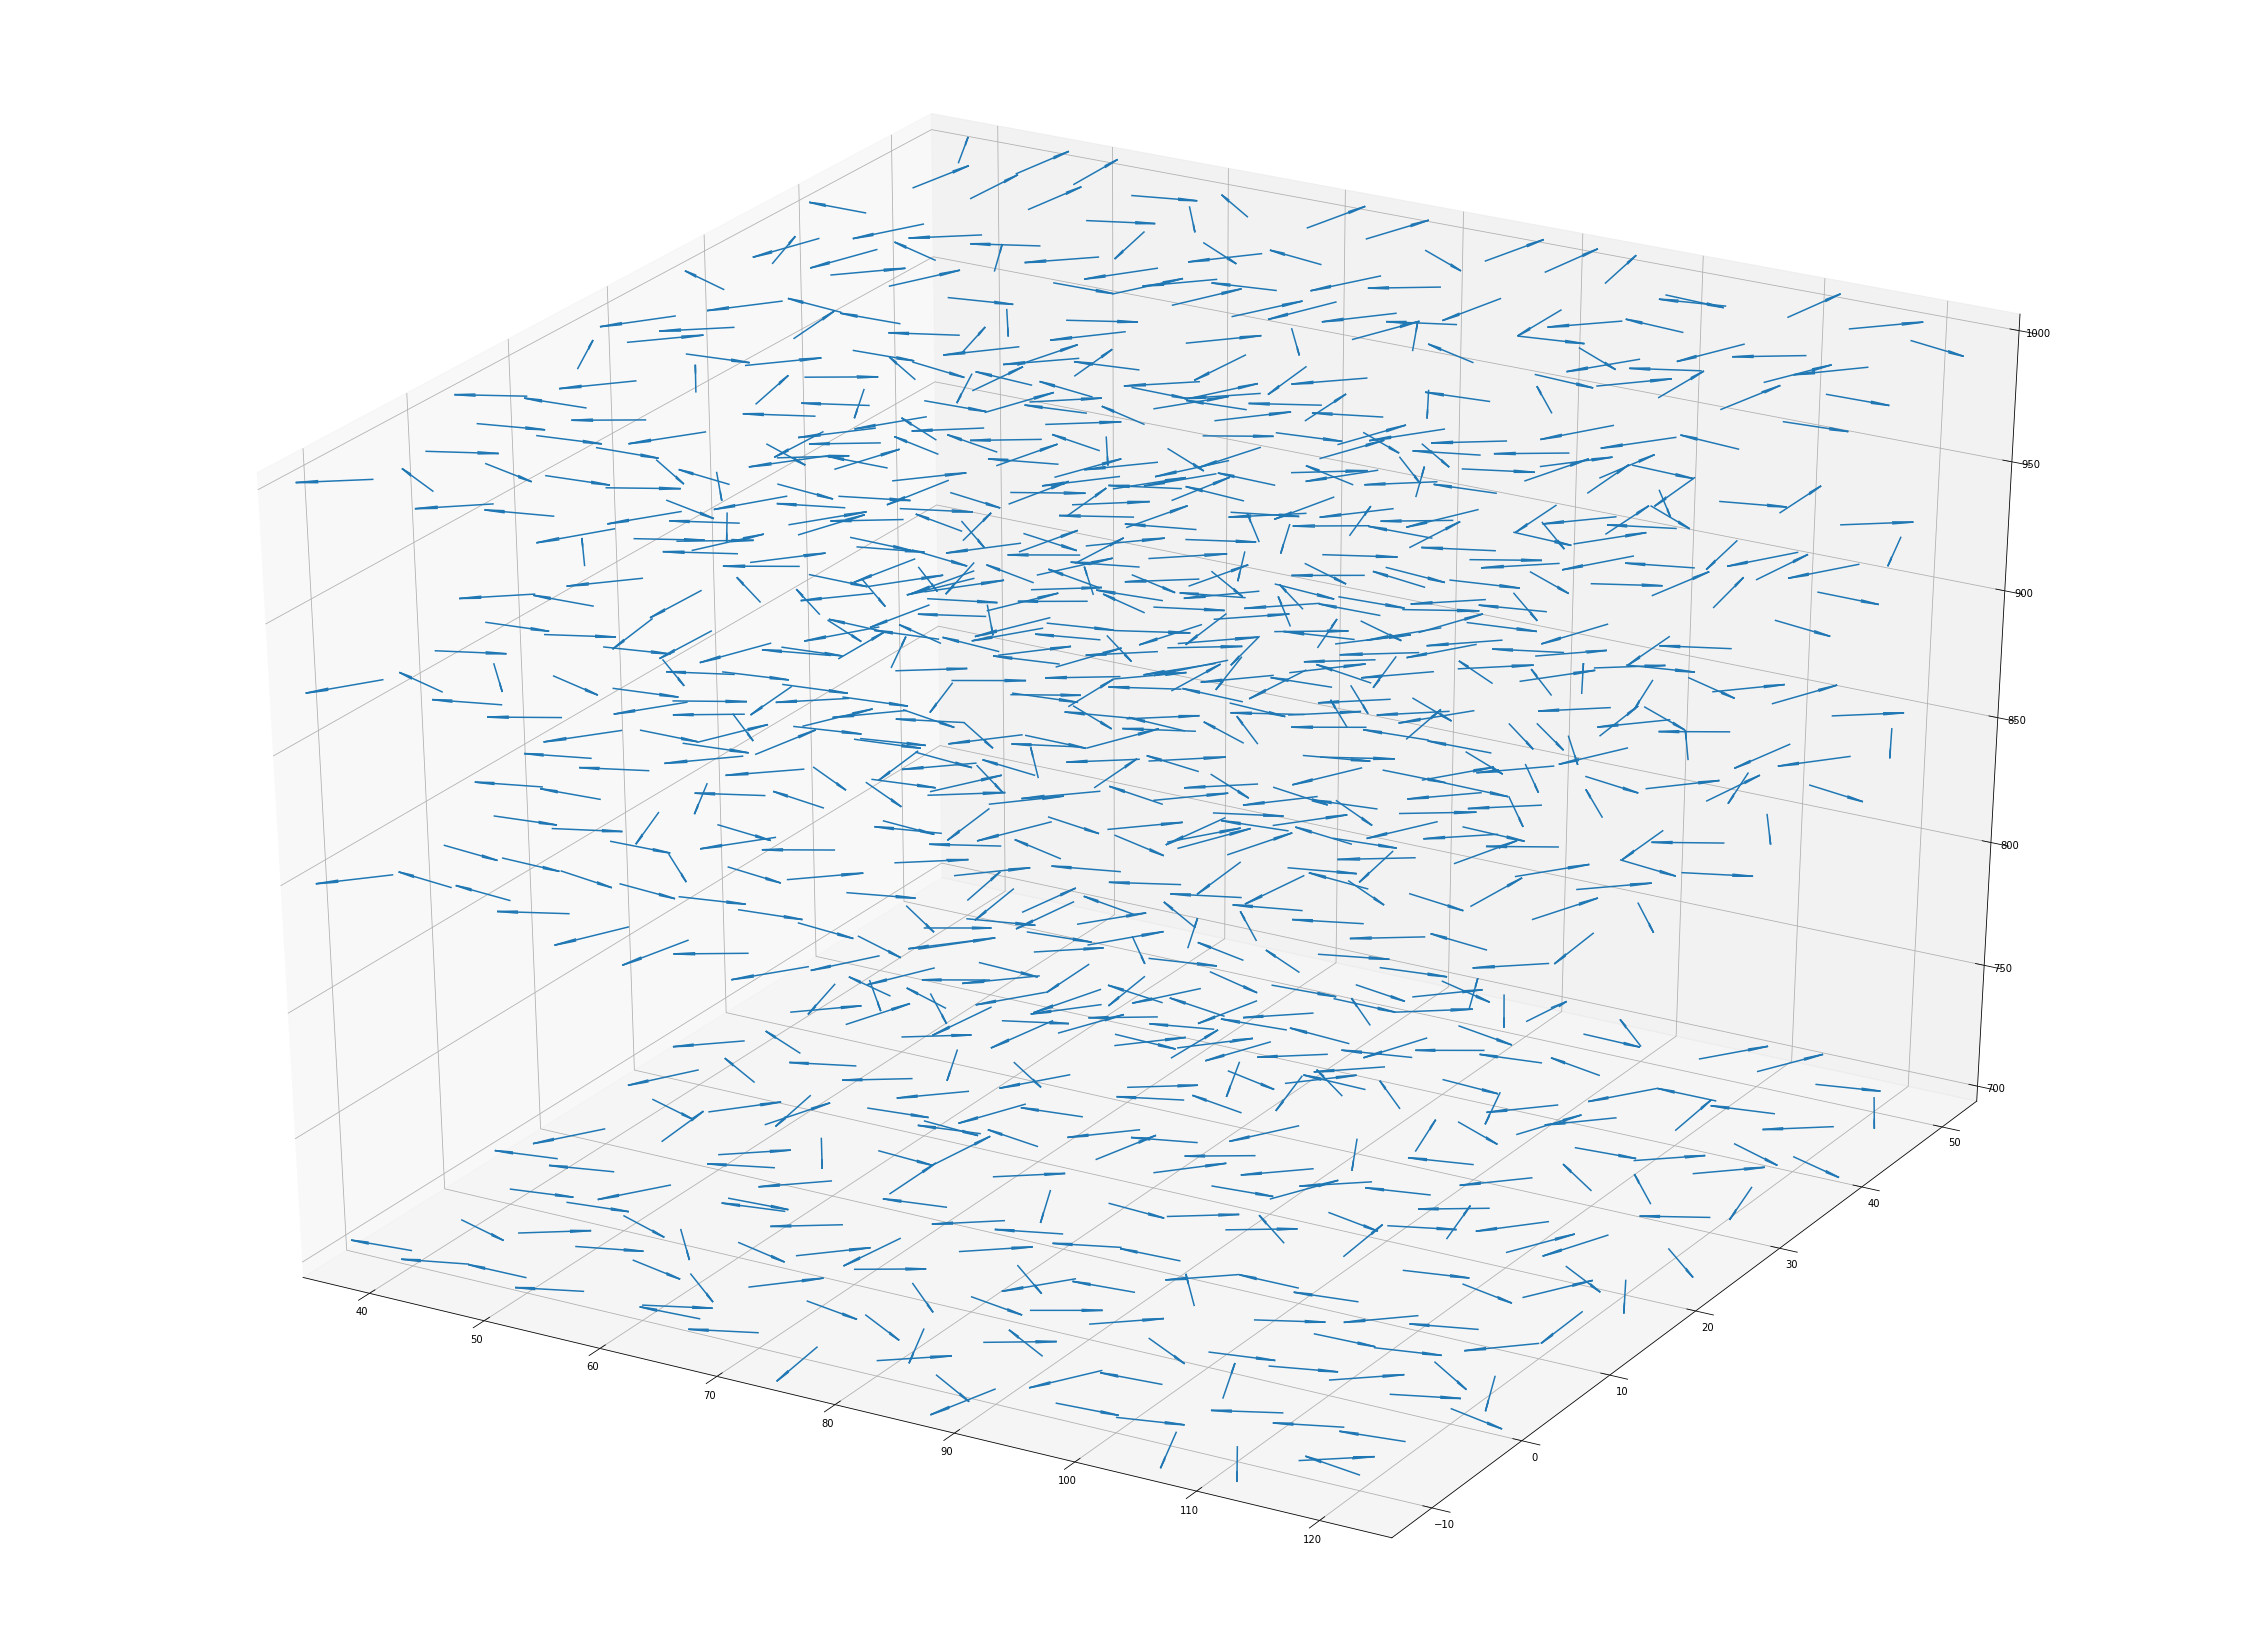

In [13]:
fig = plt.figure(figsize=[40,30])
camera = Camera(fig)
cmap1 = get_cmap('coolwarm')

for i in range(20):
    ax = fig.gca(projection='3d')
    
    uwnd_n=ncep_u.sel(lon=slice(40,120),lat=slice(50,-10))
    vwnd_n=ncep_v.sel(lon=slice(40,120),lat=slice(50,-10))
    wwnd_n=ncep_w.sel(lon=slice(40,120),lat=slice(50,-10))
    
    x = uwnd_n.lon[::2]           
    y = vwnd_n.lat[::2]
    z = wwnd_n.level[:4]
    X,Y,Z= np.meshgrid(x, y,z)
    
    u=uwnd_n.isel(time=i).sel(level=slice(1000.0 ,700.))
    v=vwnd_n.isel(time=i).sel(level=slice(1000.0 ,700.))
    w=wwnd_n.isel(time=i).sel(level=slice(1000.0 ,700.))
    
    ax.quiver(X, Y, Z, u.uwnd[:,::2,::2].values.reshape(Z.shape)
          , v.vwnd[:,::2,::2].values.reshape(Z.shape), 
         w.omega[:,::2,::2].values.reshape(Z.shape), length=5,cmap=cmap1,normalize=True)
    
    
    
    
#     x=rain.LONGITUDE
#     y=rain.LATITUDE
#     X, Y = np.meshgrid(x, y)
#     Z=rain.rf[i,:,:]
#     ax.set_zlim(0, 400)
#     ax.zaxis.set_major_locator(LinearLocator(10))
#     ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#     fig.colorbar(rain_3d, label=levels,shrink=0.5, aspect=10)
    #ax.set_title('Variation of atmospheric parameters')
    plt.show()
    
    
    
    
    camera.snap()

In [14]:
animation = camera.animate()
animation.save('wind_3d.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# rain+wind (3D) +changing names+ colorbar

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.animation as animation

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [60]:
ds=xr.open_dataset('D:/pai/data/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')
ncep_uwnd = xr.open_dataset('D:/pai/data/ncepreanalysis_uwnd.mon.mean_jan1948topresent.nc')
ncep_vwnd = xr.open_dataset('D:/pai/data/ncepreanalysis_vwind.mon.mean_jan1948topresent.nc')
ncep_wwnd = xr.open_dataset('D:/pai/data/ncepreanalysis_omega.mon.mean_jan1948topresent.nc')

In [71]:
ds


<xarray.Dataset>
Dimensions:    (LATITUDE: 50, LONGITUDE: 51, time: 456)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 57.5 58.5 59.5 60.5 ... 105.5 106.5 107.5
  * LATITUDE   (LATITUDE) float64 -8.5 -7.5 -6.5 -5.5 ... 37.5 38.5 39.5 40.5
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    rf         (time, LATITUDE, LONGITUDE) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Wed Mar 25 17:02:22 2020: cdo mergegrid BMD_1982_2018.nc Me...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

In [67]:
ncep_u=ncep_uwnd.sel(time=slice('1982-01-01','2019-12-01'))
ncep_v=ncep_vwnd.sel(time=slice('1982-01-01','2019-12-01'))
ncep_w=ncep_wwnd.sel(time=slice('1982-01-01','2019-12-01'))

C:\Users\This-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.


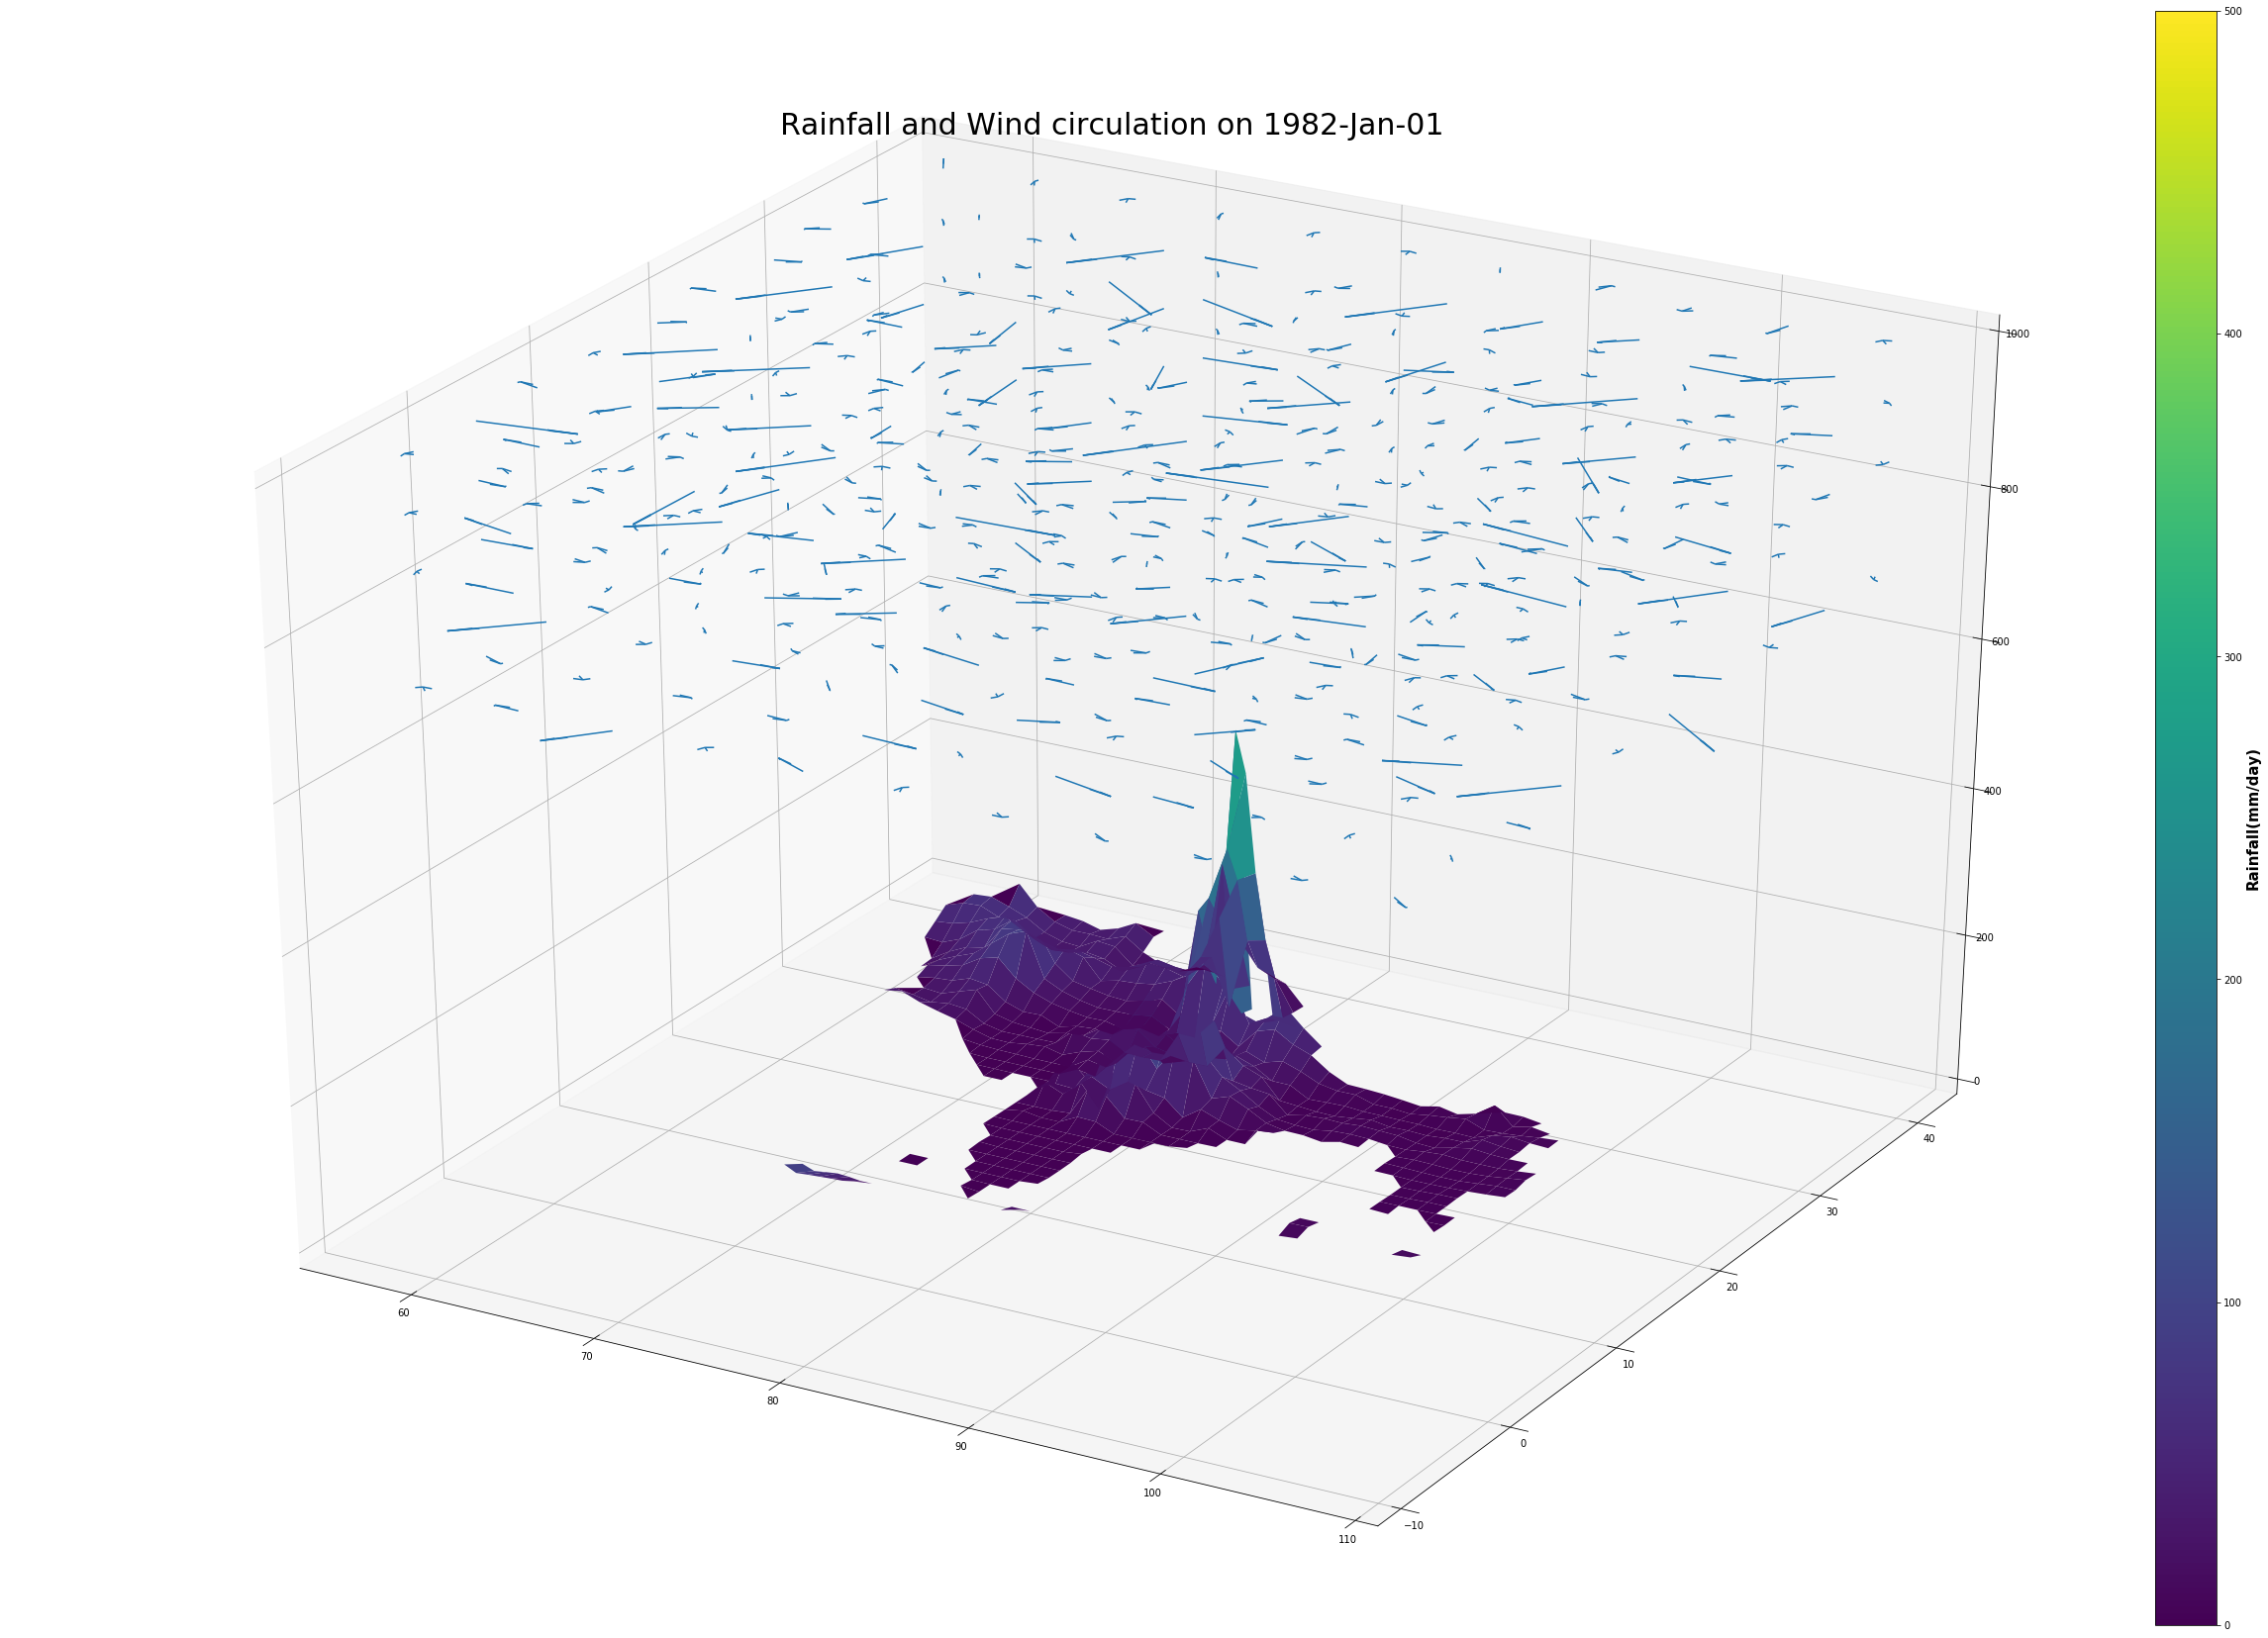

In [69]:
fig = plt.figure(figsize=[40,30])
ax  = fig.add_subplot(111, projection='3d')
cax = fig.add_subplot(1,30,30)

def update(iternum):
    ax.clear()
    cax.clear()
    ax.set_title('Rainfall and Wind circulation on '+ pd.to_datetime(ds.time[iternum].values).strftime('%Y-%b-%d'),fontsize= 30)
 
   ######## This line change variable of each time steps ###########
  ######## The variable used here has dimension of (time,level,lat,lon)#######
  #  We are trying to animate over time so ime dimension set to iternum
  # and for one level, hence level is set to 0 (You can change the level accordingly)
   
    x=ds.LONGITUDE.values
    y=ds.LATITUDE.values
    X, Y = np.meshgrid(x, y)
    curVals  = ds.rf[iternum,:,:].values
 
    vmax=500
    vmin=0

#     vmax     = np.max(curVals)
#     vmin     = np.min(curVals)
   
    levels   = np.linspace(vmin, vmax, 200, endpoint = True)
    p = ax.plot_surface(X, Y, curVals, rstride=1, cstride=1,alpha=1,
            cmap='viridis', vmax=vmax, vmin=vmin, label=levels)
    cb=fig.colorbar(p, cax=cax) # Colorbar does not update
    cb.set_label(label='Rainfall(mm/day)',weight='bold',size=15)
    
    
    
    uwnd_n=ncep_u.sel(lon=slice(57.5,107.5),lat=slice(40,-8))
    vwnd_n=ncep_v.sel(lon=slice(57.5,107.5),lat=slice(40,-8))
    wwnd_n=ncep_w.sel(lon=slice(57.5,107.5),lat=slice(40,-8))

    x = uwnd_n.lon[::2]           
    y = vwnd_n.lat[::2]
    z = wwnd_n.level[:4]
    X,Y,Z= np.meshgrid(x, y,z)

    u=uwnd_n.isel(time=iternum).sel(level=slice(1000.0 ,700.))
    v=vwnd_n.isel(time=iternum).sel(level=slice(1000.0 ,700.))
    w=wwnd_n.isel(time=iternum).sel(level=slice(1000.0 ,700.))
    ax.set_zlim(0, 1000)
    ax.quiver(X, Y, Z, u.uwnd[:,::2,::2].values.reshape(Z.shape),
              v.vwnd[:,::2,::2].values.reshape(Z.shape), 
              (w.omega[:,::2,::2].values.reshape(Z.shape)*1000),
              length=5,cmap='coolwarm',normalize=True)

    
    

   
 
######### Chnage the frames value as you want, this value is cooresponding to number
# of iteration or number of time steps for animation
ani = animation.FuncAnimation(fig, update, frames=456, interval=800, blit=False,
                            repeat_delay=2000)
plt.show()

In [70]:
#animation = camera.animate()
ani.save('rain_wind_3d.gif', writer = 'imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\Users\This-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\This-PC\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
